In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


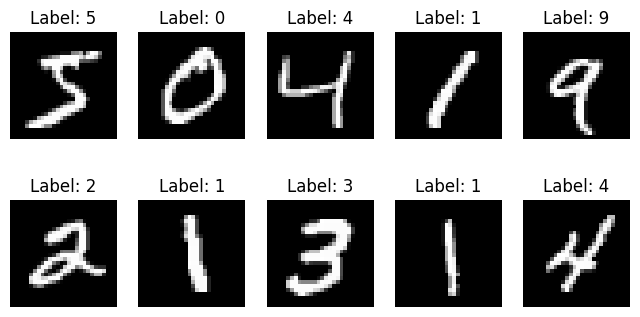

In [3]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()


In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),          # Flatten 28x28 images into a vector
    Dense(128, activation='relu'),         # Hidden layer with 128 neurons
    Dense(64, activation='relu'),          # Another hidden layer
    Dense(10, activation='softmax')        # Output layer for 10 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.2, verbose=2)

Epoch 1/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9200 - loss: 0.2730 - val_accuracy: 0.9545 - val_loss: 0.1507
Epoch 2/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9664 - loss: 0.1118 - val_accuracy: 0.9683 - val_loss: 0.1104
Epoch 3/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9759 - loss: 0.0774 - val_accuracy: 0.9691 - val_loss: 0.0999
Epoch 4/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9814 - loss: 0.0582 - val_accuracy: 0.9744 - val_loss: 0.0873
Epoch 5/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9713 - val_loss: 0.1058
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9886 - loss: 0.0351 - val_accuracy: 0.9743 - val_loss: 0.0968
Epoch 7/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9908 - loss: 0.0289 - val_accuracy: 0.9728 - val_loss: 0.1056
Epoch 8/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9763 - val_loss: 0.1010
Epoch 9/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9921 - loss: 0.0228 - val_accuracy: 0.9737 - 

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9771


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


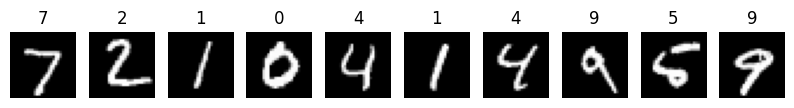

In [7]:
predictions = model.predict(x_test[:10])
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"{np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()
